<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Discriminative_Unsupervised_Feature_Learning_with_Exemplar_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Discriminative Unsupervised Feature Learning with Exemplar Convolutional Neural Networks**

논문 링크: https://arxiv.org/abs/1406.6909

supervise CNN은 image classification, detection, semantic segmentation과 같은 다양한 Computer Vision 분야에서 전례 없는 성능을 보여줬다. 흥미로운 사실은, ImageNet 데이터셋을 통해 학습한  분류네트워크가 **PASCAL VOC** 데이터셋에서도 잘 분류를 하는 등 종종 새로운 데이터셋에 대해 일반화하기도 한다. 하지만, 이러한 network들은 적어도 2가지의 단짐이 있는데,

1. label이 부착된 대규모 데이터셋이 필요하다. 이런 데이터셋의 경우 수집하기도 어렵다. 따라서 임의의 양의 데이터로 학습할 수 있는 비지도 학습이 비록 제한된 성능이지만 주목을 받는다.
2. 분류를 위해 학습된 CNN은 object detection, semantic segmentation, image retrieval과 같은 유사한 작업은 잘 일반화되지만, 새 작업이 원래 훈련 작업과 다를수록 효율성이 떨어진다.

대부분은 train을 위해 충분히 많은 input-output 쌍이 필요하다. 이런 대규모 데이터셋을 얻는 것은 새로운 연구에 접근할 때 중요한 준비물 중 한개이다. 본 논문에서는 일반적인 특징 검출을 목표로 unlabeled data만을 사용하여 CNN을 학습하기 위한 새로운 접근 방식을 제안했다.

## **Exemplar-CNN**

본 논문에서는 unlabeled image에서 자동으로 생성된 surrogate task을 사용하는 CNN 훈련 절차를 제안한다. 생성된 surrogate task는 전형적인 변화(typical variations)에 대해 descriptive하고 yield generic한 특징들 산출하도록 설계된다.

변화는 'seed' image에 변환을 임의로 적용하여 시물레이션된다. 이 이미지와 변환 버전은 surrogate class를 구성한다. 이전의 data augmentation과는 대조적으로, surrogate class를 구축하기 위해 단 하나의 seeding sample만이 필요하다. 이렇게 훈련된 네트워크를 **Exemplar-CNN**이라 부른다.

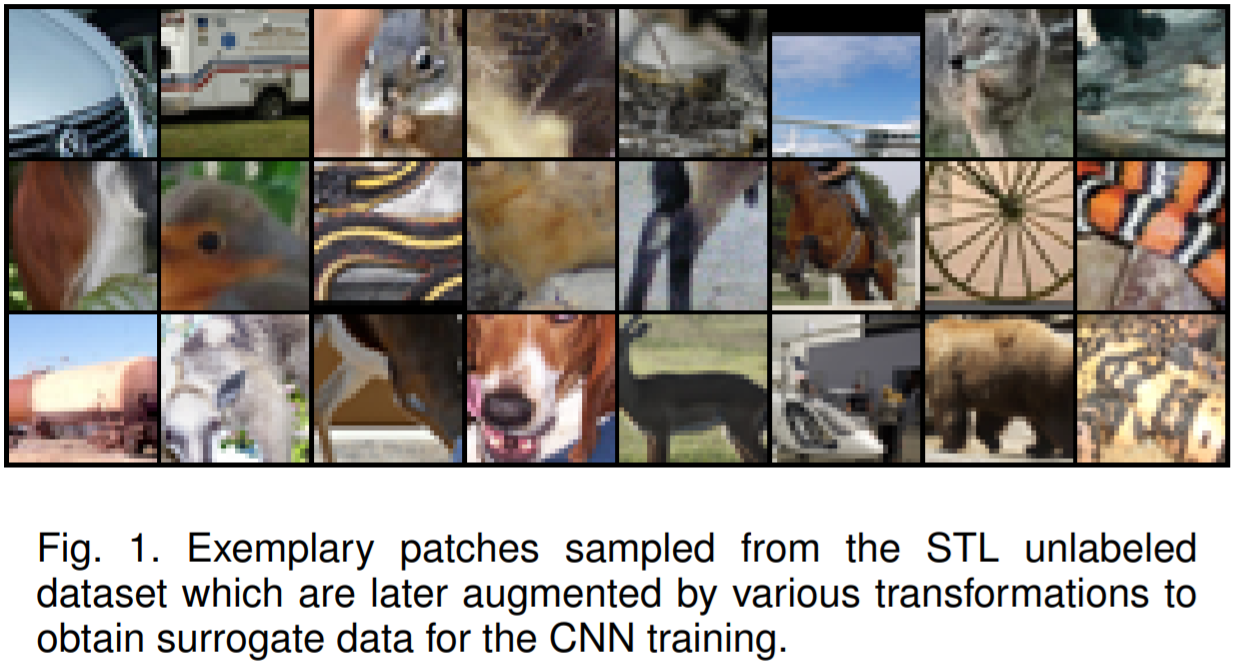

먼저, training에 쓰일 input은 나중에 train 후에 적용될 target task의 이미지와 거의 동일한 분포를 가진 이미지를 선택한다. 또한, Fig 1처럼 object를 포함하거나 object의 part를 포함하고 있는 patch에 중점을 두었기 때문에 이미지에서 중요한 부분 즉. considerable gradients를 가지고 있는 32 x 32 size의 patch를 하나씩 추출했다. 이를 **Seed patch**라 한다.

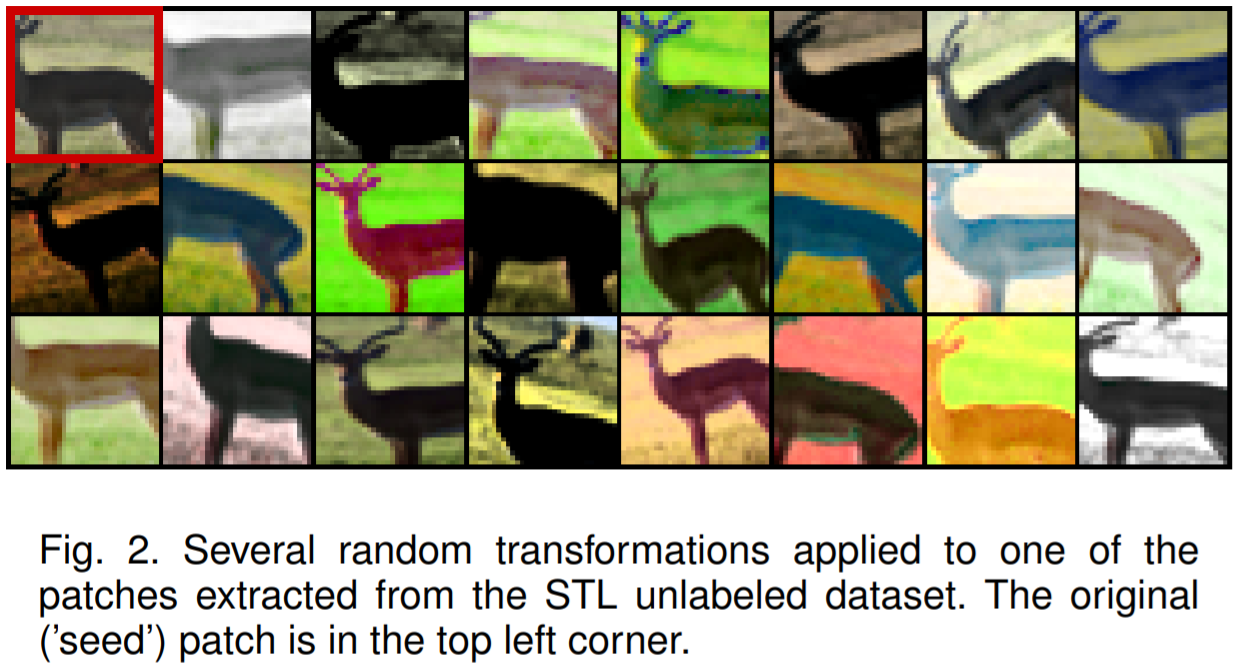

그 다음 Fig 1에서 추출한 patch들로 transformations을 해주는데,
- translation: vertical and horizontal translation by a
distance within 0.2 of the patch size;
- scaling: multiplication of the patch scale by a factor
between 0.7 and 1.4;
- rotation: rotation of the image by an angle up to 20
degrees;
- contrast 1: multiply the projection of each patch pixel
onto the principal components of the set of all pixels by
a factor between 0.5 and 2 (factors are independent for
each principal component and the same for all pixels
within a patch);
- contrast 2: raise saturation and value (S and V components of the HSV color representation) of all pixels to a
power between 0.25 and 4 (same for all pixels within
a patch), multiply these values by a factor between 0.7
and 1.4, add to them a value between −0.1 and 0.1;
- color: add a value between −0.1 and 0.1 to the hue
(H component of the HSV color representation) of all
pixels in the patch (the same value is used for all pixels
within a patch).

위의 옵션들로 진행하게 된다.

이를 통해 나온 output이 Fig 2이다.

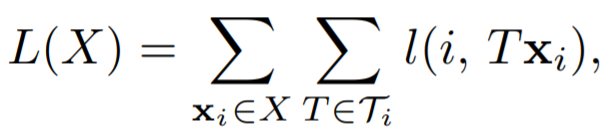

이렇게 얻은 patch들은 하나의 동일한 class로 학습을 해야하는데 위의 수식이 바로 Loss Function이다. I(i, T(x(i)))는 Transformed sample과 surrogate ture label i 사이의 loss를 의미한다. 즉, 하나의 이미지가 하나의 class를 갖게 되는데, 이는 데이터셋이 커질수록 class의 수도 그만큼 늘어난다는 문제를 가지고 있으며 이는 즉, 학습하기 어렵다는 단점을 가지고 있다.

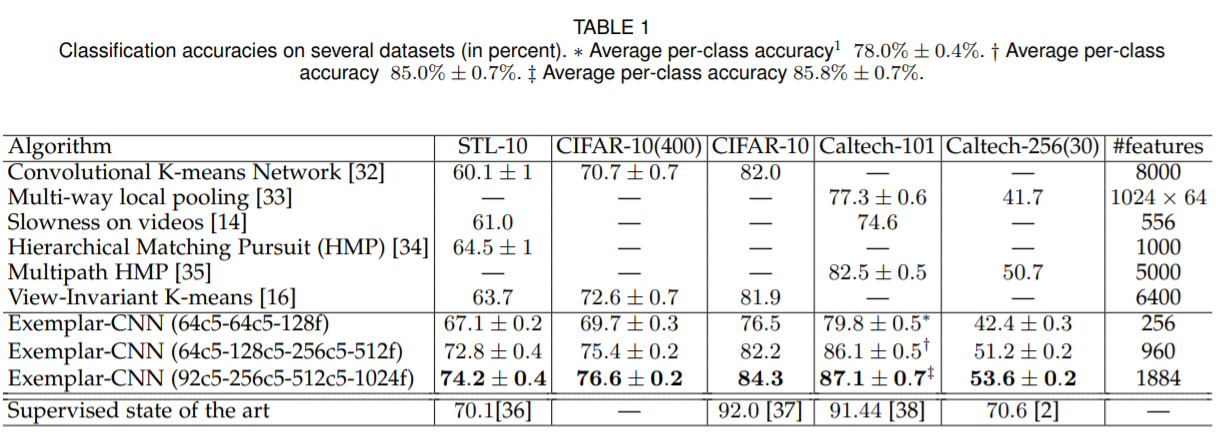

위의 표는 학습의 결과이다.